# Data Preprocessing

**Import Libraries**

In [153]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

**Import Dataset**

In [154]:
data = pd.read_csv('minute_weather.csv')

**Sampeling Data**

In [155]:
sampled_df = data[(data['rowID'] % 10) == 0]

**Cleaning Data**

In [156]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
            'max_wind_direction', 'max_wind_speed', 'relative_humidity']
sampled_df = sampled_df[features].dropna()

**Feature Scaling**

In [157]:
X = StandardScaler().fit_transform(sampled_df)

# Traning The Model

**Traning the Model on K-Means clustering**




In [158]:
kmeans = KMeans(n_clusters=12, random_state=42)
model = kmeans.fit(X)
centers = model.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Visualizing Results

**Defining Helper Functions**

In [159]:
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')
    Z = [np.append(A, index) for index, A in enumerate(centers)]
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [160]:
def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,4))
    plt.gca().axes.set_ylim([-3, +3])
    parallel_coordinates(data, 'prediction', color=my_colors, marker='o')

**Visualing Results using parallel plot**

<Figure size 640x480 with 0 Axes>

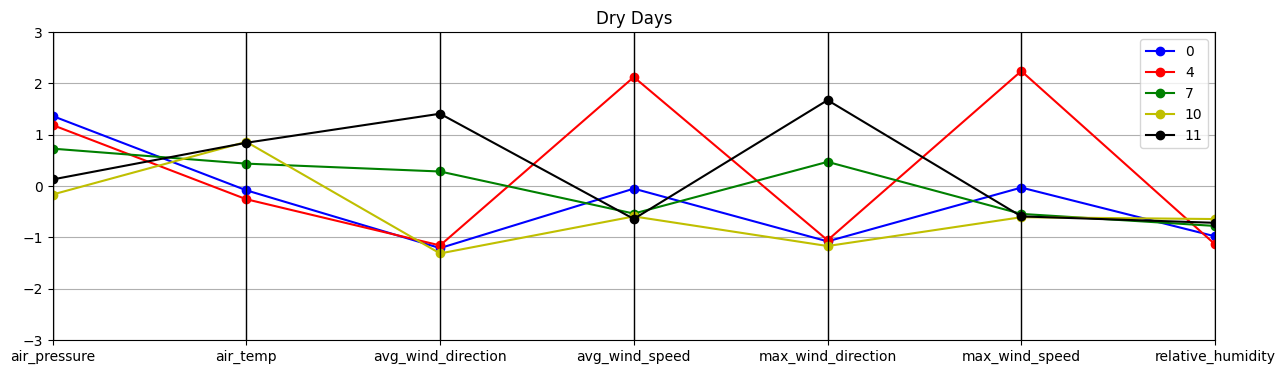

<Figure size 640x480 with 0 Axes>

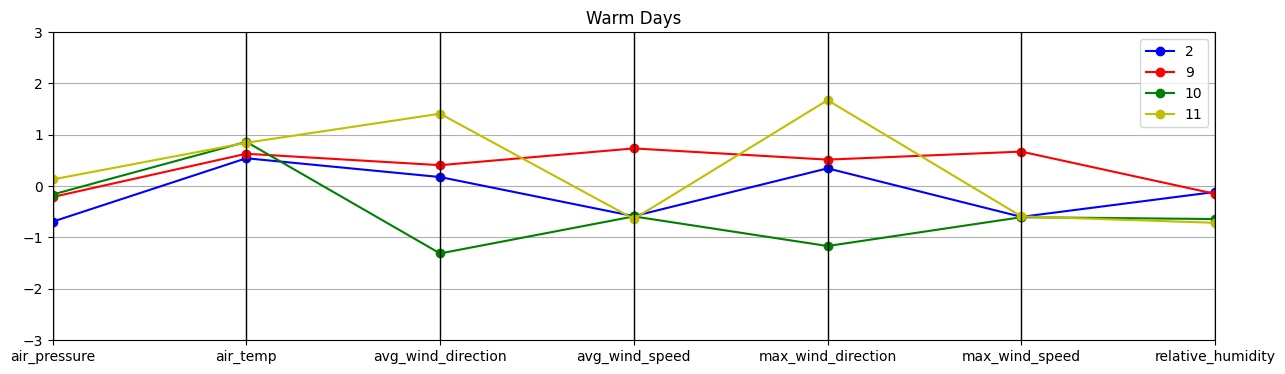

<Figure size 640x480 with 0 Axes>

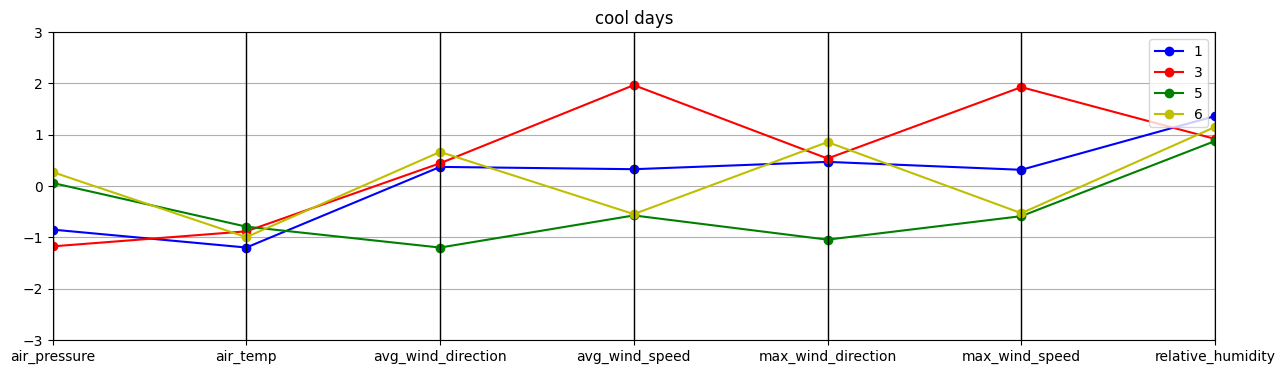

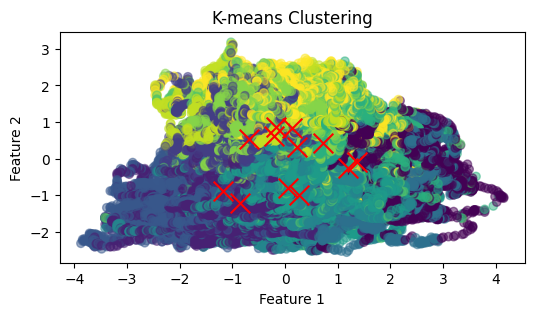

In [161]:
P = pd_centers(features, centers)


plt.figure()
parallel_plot(P[P['relative_humidity'] < -0.5])
plt.title('Dry Days')
plt.show()

plt.figure()
parallel_plot(P[P['air_temp'] > 0.5])
plt.title('Warm Days')
plt.show()

plt.figure()
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])
plt.title('cool days')
plt.show()

plt.figure(figsize=(6, 3))
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap='viridis', marker='o', alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='x')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
